In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [61]:
ls

01_using_gpu.ipynb            input/      ratings.csv        weights100.csv
02_TensorFlow_with_GPU.ipynb  PCA2.ipynb  ratings_small.csv  weights10.csv
0325.ipynb                    PCA2.zip    raw/               weights50.csv
03_toy_example.ipynb          PCA.ipynb   TermProject.ipynb  weights.csv
04_MNIST_example.ipynb        processed/  Untitled


In [ ]:
cd 'My Drive'

In [ ]:
cd 'Colab Notebooks'

In [55]:
import pandas as pd

columns = []
for idx in range(128):
  columns.append(idx + 1)

#print(columns)

weights = pd.read_csv('weights100.csv', names = columns)
#data = data.T
weights.head(5)
weights.shape
weights = weights[:400]
#weights = weights[,400:]
weights.shape

(400, 128)

In [ ]:
data = data.T
data.head(5)

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
from sklearn.preprocessing import StandardScaler

weights_scaled = StandardScaler().fit_transform(weights)

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(weights_scaled)
weights_pca = pca.transform(weights_scaled)
print(weights_pca.shape)

(400, 2)


In [58]:
pca_columns=['pca_component_1','pca_component_2']
weightsDF_pca = pd.DataFrame(weights_pca,columns = pca_columns)
weightsDF_pca.head(3)

,pca_component_1,pca_component_2
0,-1.067077,-0.392115
1,3.082019,1.805823
2,0.281501,0.642344


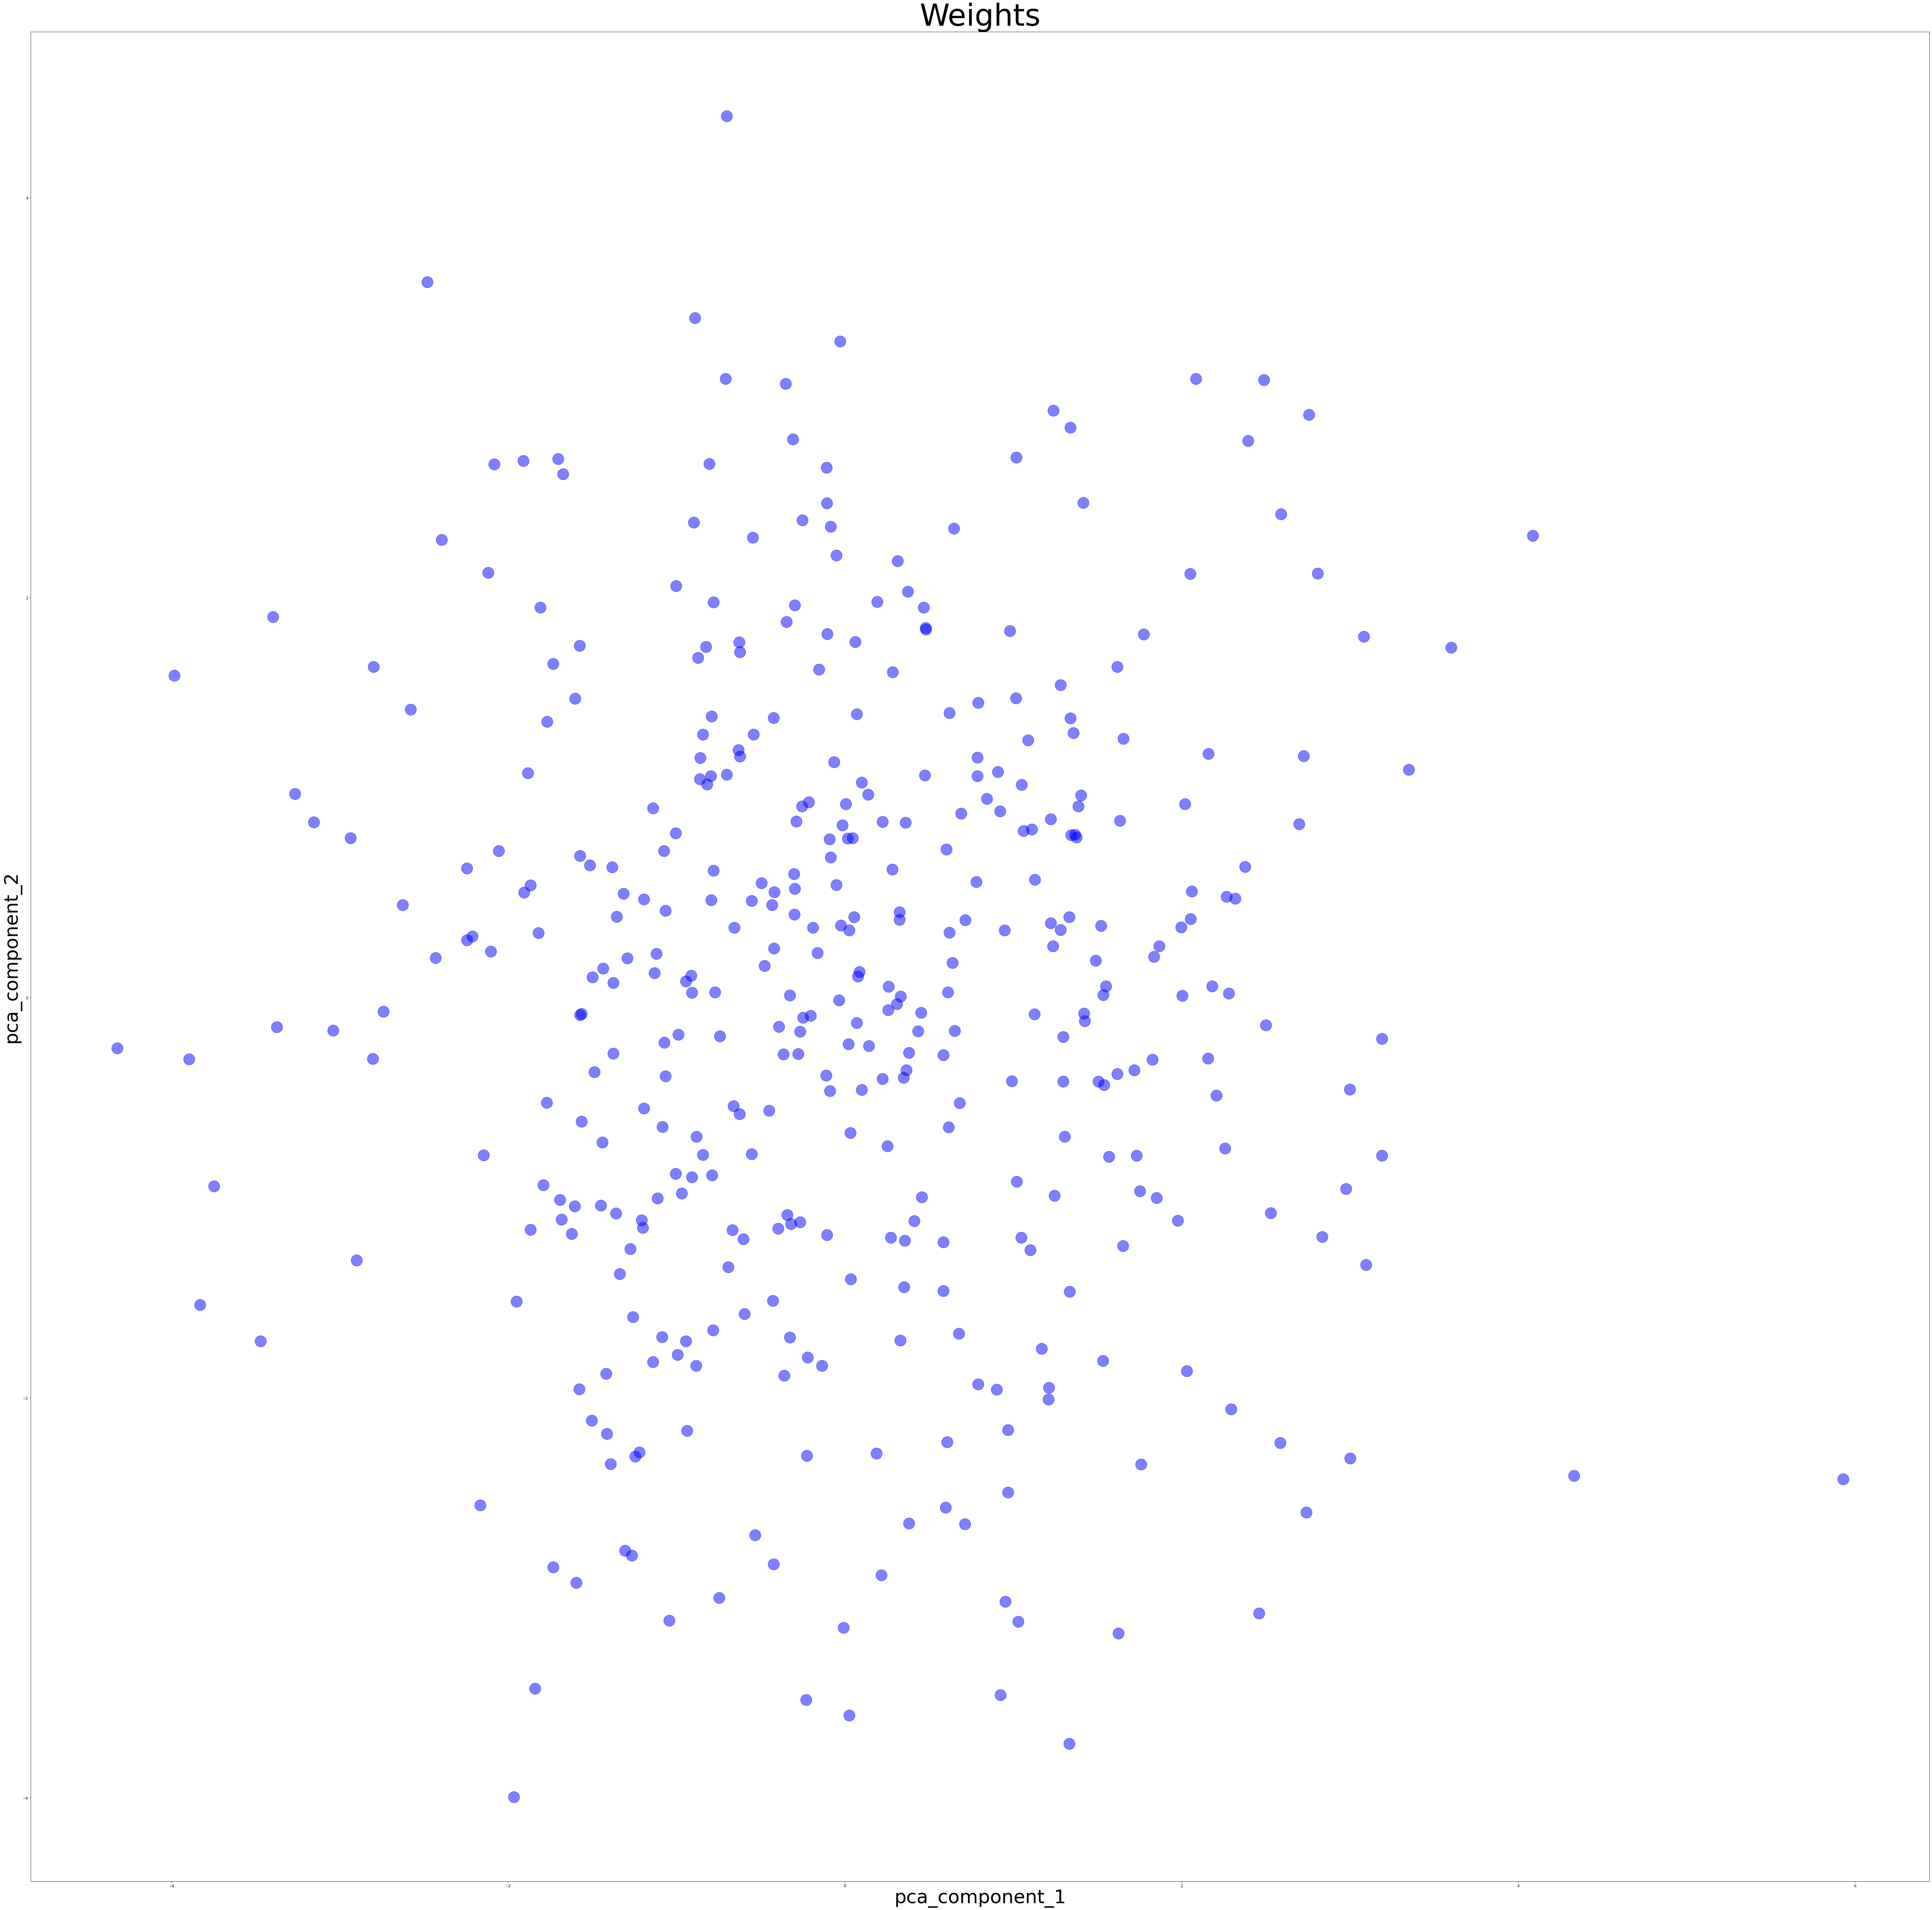

In [60]:
plt.figure(figsize=(90, 90))
plt.plot(pca_columns[0],
         pca_columns[1],
         data = weightsDF_pca,
         linestyle = 'none',
         marker = 'o',
         markersize = 30,
         color = 'blue',
         alpha = 0.5)

plt.title('Weights', fontsize = 80)
plt.xlabel(pca_columns[0], fontsize = 50)
plt.ylabel(pca_columns[1], fontsize = 50)
plt.show()